# Recognition of Yoga Postures

## Necessary libraries
We choose
[Pytorch](https://pytorch.org/)
as our framework for this project for its learning parh and It is Simple GPU installation.
And we are going to work with

In [4]:
import os
import shutil
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from utils import split_data
from fastai.vision.all import get_image_files,verify_images
import gradio as gr
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [5]:
# check if CUDA is available to use GPU on the training 
train_on_gpu = tf.test.is_gpu_available()

if train_on_gpu:
    print('GPU con soporte CUDA disponible')
else:
    print('No se encontró GPU con soporte CUDA')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU con soporte CUDA disponible


2023-08-16 19:58:27.391951: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-16 19:58:27.391980: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-16 19:58:27.391996: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-16 19:58:27.392687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-16 19:58:27.393299: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
images=get_image_files('../YOGA/dataset')
images
failed = verify_images(images)
failed

(#0) []

In [7]:
images=get_image_files('../YOGA/DATA')
images
failed = verify_images(images)
failed

(#0) []

In [8]:
images=get_image_files('../YOGA/dataset/test/')
images
failed = verify_images(images)
failed

(#0) []

In [9]:
# Define paths
downdog_SRC_DIR = "data/downdog"
goddess_SRC_DIR = "data/goddess"
plank_SRC_DIR = "data/plank"
tree_SRC_DIR = "data/tree"
warrior_SRC_DIR = "data/warrior"
TRAINING_DIR = "dataset/training"
VALIDATION_DIR = "dataset/validation"
TEST_DIR = "dataset/test"
#splitting the dataset
TRAINING_DDG_DIR = os.path.join(TRAINING_DIR, "downdog/")
VALIDATION_DDG_DIR = os.path.join(VALIDATION_DIR, "downdog/")
TEST_DDG_DIR = os.path.join(TEST_DIR, "downdog/")

TRAINING_GDS_DIR = os.path.join(TRAINING_DIR, "goddess/")
VALIDATION_GDS_DIR = os.path.join(VALIDATION_DIR, "goddess/")
TEST_GDS_DIR = os.path.join(TEST_DIR, "goddess/")

TRAINING_PLANK_DIR = os.path.join(TRAINING_DIR, "plank/")
VALIDATION_PLANK_DIR = os.path.join(VALIDATION_DIR, "plank/")
TEST_PLANK_DIR = os.path.join(TEST_DIR, "plank/")

TRAINING_TREE_DIR = os.path.join(TRAINING_DIR, "tree/")
VALIDATION_TREE_DIR = os.path.join(VALIDATION_DIR, "tree/")
TEST_TREE_DIR = os.path.join(TEST_DIR, "tree/")

TRAINING_WR_DIR = os.path.join(TRAINING_DIR, "warrior/")
VALIDATION_WR_DIR = os.path.join(VALIDATION_DIR, "warrior/")
TEST_WR_DIR = os.path.join(TEST_DIR, "warrior/")
# Define proportion of images used for training
train_size = 0.8
val_size = 0.1
test_size = 0.1

split_data(downdog_SRC_DIR,
           TRAINING_DDG_DIR,
           VALIDATION_DDG_DIR,
           TEST_DDG_DIR,
           split_ratio=(train_size,val_size, test_size))

split_data(goddess_SRC_DIR,
           TRAINING_GDS_DIR,
           VALIDATION_GDS_DIR,
           TEST_GDS_DIR,
           split_ratio=(train_size,val_size, test_size))

split_data(plank_SRC_DIR,
           TRAINING_PLANK_DIR,
           VALIDATION_PLANK_DIR,
           TEST_PLANK_DIR,
           split_ratio=(train_size,val_size, test_size))

split_data(tree_SRC_DIR,
           TRAINING_TREE_DIR,
           VALIDATION_TREE_DIR,
           TEST_TREE_DIR,
           split_ratio=(train_size,val_size, test_size))
split_data(warrior_SRC_DIR,
           TRAINING_WR_DIR,
           VALIDATION_WR_DIR,
           TEST_WR_DIR,
           split_ratio=(train_size,val_size, test_size))

Splitting data completed.
Splitting data completed.
Splitting data completed.
Splitting data completed.
Splitting data completed.


In [10]:
print(f"Original Downdog directory has {len(os.listdir(downdog_SRC_DIR))} images")
print(f"Original Goddess directory has {len(os.listdir(goddess_SRC_DIR))} images")
print(f"Original Plank directory has {len(os.listdir(plank_SRC_DIR))} images")
print(f"Original Tree directory has {len(os.listdir(tree_SRC_DIR))} images")
print(f"Original Warrior directory has {len(os.listdir(warrior_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_DDG_DIR))} images of Dogdown for training")
print(f"There are {len(os.listdir(TRAINING_GDS_DIR))} images of Goddess for training")
print(f"There are {len(os.listdir(TRAINING_PLANK_DIR))} images of Plank for training")
print(f"There are {len(os.listdir(TRAINING_TREE_DIR))} images of Tree for training")
print(f"There are {len(os.listdir(TRAINING_WR_DIR))} images of Warrior for training\n")

print(f"There are {len(os.listdir(VALIDATION_DDG_DIR))} images of Dogdown for validation")           
print(f"There are {len(os.listdir(VALIDATION_GDS_DIR))} images of Goddess for validation")
print(f"There are {len(os.listdir(VALIDATION_PLANK_DIR))} images of Plank for validation")
print(f"There are {len(os.listdir(VALIDATION_TREE_DIR))} images of Tree for validation")
print(f"There are {len(os.listdir(VALIDATION_WR_DIR))} images of Warrior for validation\n")

print(f"There are {len(os.listdir(TEST_DDG_DIR))} images of Dogdown for test")
print(f"There are {len(os.listdir(TEST_GDS_DIR))} images of Goddess for test")
print(f"There are {len(os.listdir(TEST_PLANK_DIR))} images of Plank for test")
print(f"There are {len(os.listdir(TEST_TREE_DIR))} images of Plank for test")
print(f"There are {len(os.listdir(TEST_WR_DIR))} images of tree for test")

Original Downdog directory has 394 images
Original Goddess directory has 330 images
Original Plank directory has 447 images
Original Tree directory has 308 images
Original Warrior directory has 422 images

There are 315 images of Dogdown for training
There are 264 images of Goddess for training
There are 357 images of Plank for training
There are 246 images of Tree for training
There are 337 images of Warrior for training

There are 39 images of Dogdown for validation
There are 33 images of Goddess for validation
There are 44 images of Plank for validation
There are 30 images of Tree for validation
There are 42 images of Warrior for validation

There are 40 images of Dogdown for test
There are 33 images of Goddess for test
There are 46 images of Plank for test
There are 32 images of Plank for test
There are 43 images of tree for test


## Data


In [26]:
# Definir un generador de imágenes con transformaciones
batch_size = 16
width=250
height=250
data_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.20

)


# Cargar imágenes del directorio y aplicar transformaciones
train_data = data_generator.flow_from_directory(
    TRAINING_DIR,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='sparse',  
    color_mode="rgb"
)

validation_data = data_generator.flow_from_directory(
    VALIDATION_DIR,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='sparse',
)

test_data = data_generator.flow_from_directory(
    TEST_DIR,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='sparse',
)


Found 1517 images belonging to 5 classes.
Found 187 images belonging to 5 classes.
Found 194 images belonging to 5 classes.


In [12]:
for data, labels in train_data:
    print(labels)
    # Aquí puedes agregar más código para inspeccionar los datos y etiquetas
    break  # Detenemos el ciclo después de imprimir las etiquetas de un lote


[2. 1. 0. 1. 0. 4. 3. 3. 0. 4. 2. 0. 2. 0. 3. 2.]


In [13]:
train_data

Observemos una imagen 

['downdog', 'goddess', 'plank', 'tree', 'warrior']


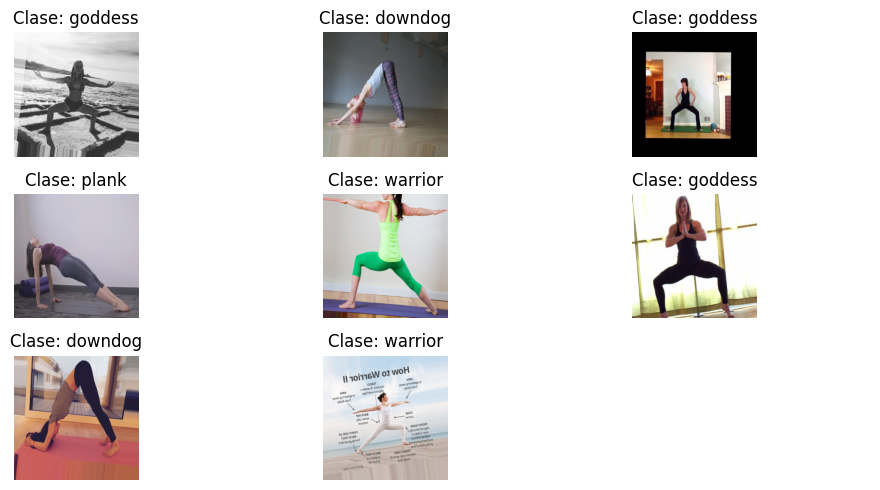

In [14]:

# Obtener un lote de imágenes y etiquetas del generador de datos
images, labels = next(train_data)

# Etiquetas de las clases (nombre de las carpetas)
class_labels = list(train_data.class_indices.keys())
print(class_labels)
# Configurar subplots
num_images = 8
num_cols = 3 # Número de columnas en la cuadrícula
num_rows = (num_images + num_cols - 1) // num_cols  # Calcular el número de filas necesarias

# Crear una cuadrícula de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Iterar a través de las imágenes y subplots
for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        image = images[i]
        label = class_labels[int(labels[i])]
        
        ax.imshow(image)
        ax.set_title(f"Clase: {label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [15]:
class Net(models.Model):
    def __init__(self):
        super(Net, self).__init__()

        # Primera serie de capas convolucionales y pooling
        self.conv1_1 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
        self.conv1_2 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(pool_size=(2, 2))

        # Segunda serie de capas convolucionales y pooling
        self.conv2_1 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')
        self.conv2_2 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(pool_size=(2, 2))

        # Tercera serie de capas convolucionales y pooling
        self.conv3_1 = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')
        self.conv3_2 = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(pool_size=(2, 2))

        # Cuarta serie de capas convolucionales y pooling
        self.conv4_1 = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')
        self.conv4_2 = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')
        self.bn4 = layers.BatchNormalization()
        self.pool4 = layers.MaxPooling2D(pool_size=(2, 2))

        self.flatten = layers.Flatten()

        # Capas densas
        self.fc1 = layers.Dense(512, activation='relu')
        self.dropout1 = layers.Dropout(0.3)
        self.fc2 = layers.Dense(256, activation='relu')
        self.dropout2 = layers.Dropout(0.3)
        self.fc3 = layers.Dense(128, activation='relu')
        self.dropout3 = layers.Dropout(0.3)
        self.fc4 = layers.Dense(5, activation='softmax')

    def call(self, x):
        x = self.pool1(self.bn1(self.conv1_2(self.conv1_1(x))))
        x = self.pool2(self.bn2(self.conv2_2(self.conv2_1(x))))
        x = self.pool3(self.bn3(self.conv3_2(self.conv3_1(x))))
        x = self.pool4(self.bn4(self.conv4_2(self.conv4_1(x))))
        x = self.flatten(x)
        x = self.dropout1(self.fc1(x))
        x = self.dropout2(self.fc2(x))
        x = self.dropout3(self.fc3(x))
        x = self.fc4(x)
        return x



In [16]:
class ImprovedNet(models.Model):
    def __init__(self):
        super(ImprovedNet, self).__init__()

        # Primera serie de capas convolucionales y pooling
        self.conv1_1 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
        self.conv1_2 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
        self.dropout1 = layers.Dropout(0.2)
        self.pool1 = layers.MaxPooling2D(pool_size=(2, 2))

        # Segunda serie de capas convolucionales y pooling
        self.conv2_1 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')
        self.conv2_2 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')
        self.dropout2 = layers.Dropout(0.2)
        self.pool2 = layers.MaxPooling2D(pool_size=(2, 2))

        # Tercera serie de capas convolucionales y pooling
        self.conv3_1 = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')
        self.conv3_2 = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')
        self.dropout3 = layers.Dropout(0.2)
        self.pool3 = layers.MaxPooling2D(pool_size=(2, 2))

        # Cuarta serie de capas convolucionales y pooling
        self.conv4_1 = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')
        self.conv4_2 = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')
        self.dropout4 = layers.Dropout(0.2)
        self.pool4 = layers.MaxPooling2D(pool_size=(2, 2))

        # Quinta serie de capas convolucionales y pooling
        self.conv5_1 = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')
        self.conv5_2 = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')
        self.dropout5 = layers.Dropout(0.2)
        self.pool5 = layers.MaxPooling2D(pool_size=(2, 2))

        self.flatten = layers.Flatten()

        # Capas densas
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc_dropout1 = layers.Dropout(0.3)
        self.fc2 = layers.Dense(32, activation='relu')
        self.fc_dropout2 = layers.Dropout(0.3)
        self.fc3 = layers.Dense(5, activation='softmax')

    def call(self, x):
        x = self.pool1(self.dropout1(self.conv1_2(self.conv1_1(x))))
        x = self.pool2(self.dropout2(self.conv2_2(self.conv2_1(x))))
        x = self.pool3(self.dropout3(self.conv3_2(self.conv3_1(x))))
        x = self.pool4(self.dropout4(self.conv4_2(self.conv4_1(x))))
        x = self.pool5(self.dropout5(self.conv5_2(self.conv5_1(x))))
        x = self.flatten(x)
        x = self.fc_dropout1(self.fc1(x))
        x = self.fc_dropout2(self.fc2(x))
        x = self.fc3(x)
        return x


In [29]:

base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(250, 250, 3))
for layer in base_model.layers:
    layer.trainable = False
class TransferNet(models.Model):
    def __init__(self, base_model_weights=None):
        super(TransferNet, self).__init__()
        self.base_model = tf.keras.applications.VGG16(include_top=False, weights=base_model_weights, input_shape=(250, 250, 3))
        self.flatten = layers.Flatten()
        
        # Capas densas
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc_dropout1 = layers.Dropout(0.3)
        self.fc2 = layers.Dense(32, activation='relu')
        self.fc_dropout2 = layers.Dropout(0.3)
        self.fc3 = layers.Dense(5, activation='softmax')

    def call(self, x):
        x = self.base_model(x)
        x = self.flatten(x)
        x = self.fc_dropout1(self.fc1(x))
        x = self.fc_dropout2(self.fc2(x))
        x = self.fc3(x)
        return x
    def get_config(self):
        return {"base_model_weights": self.base_model.weights}

    @classmethod
    def from_config(cls, config):
        return cls(**config)



In [30]:
#model = Net()
#model = ImprovedNet()
model = TransferNet(base_model)


In [31]:
from tensorflow.keras.losses import categorical_crossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import Adam

criterion = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.0005)
#optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001)

EPOCHS=20

In [32]:
print(len(train_data),len(validation_data))

95 12


In [33]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [34]:
model.compile(optimizer=optimizer, 
              loss=SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])


In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('checkpoint', monitor='val_loss', verbose=0, save_best_only=True)
#callbacks = [early_stopping, checkpoint, lr_schedule]
callbacks = [early_stopping, checkpoint]


In [36]:
STEP_SIZE_TRAIN=train_data.n//train_data.batch_size
STEP_SIZE_VALID=validation_data.n//validation_data.batch_size
STEP_SIZE_TEST=test_data.n//test_data.batch_size
STEP_SIZE_TRAIN

94

In [37]:
history =model.fit(train_data,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=validation_data,
        validation_steps=STEP_SIZE_VALID,
        epochs=EPOCHS,
        callbacks=callbacks
)

Epoch 1/20


2023-08-16 20:04:03.995701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 7/94 [=>............................] - ETA: 1:19 - loss: 5.7041 - accuracy: 0.2679

/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 5.7923 - accuracy: 0.3544

2023-08-16 20:05:31.349000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 100s 1s/step - loss: 5.7923 - accuracy: 0.3544 - val_loss: 1.5988 - val_accuracy: 0.5966
Epoch 2/20


/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 2.3471 - accuracy: 0.6003WARNING:tensorflow:Model's `__init__()` arguments contain non-serializable objects. Please implement a `get_config()` method in the subclassed Model for proper saving and loading. Defaulting to empty config.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 96s 1s/step - loss: 2.3471 - accuracy: 0.6003 - val_loss: 1.2256 - val_accuracy: 0.6818
Epoch 3/20
 2/94 [..............................] - ETA: 1:53 - loss: 1.4873 - accuracy: 0.6562

/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 1.6327 - accuracy: 0.6775WARNING:tensorflow:Model's `__init__()` arguments contain non-serializable objects. Please implement a `get_config()` method in the subclassed Model for proper saving and loading. Defaulting to empty config.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 99s 1s/step - loss: 1.6327 - accuracy: 0.6775 - val_loss: 1.1878 - val_accuracy: 0.6818
Epoch 4/20


/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 1.0088 - accuracy: 0.7495WARNING:tensorflow:Model's `__init__()` arguments contain non-serializable objects. Please implement a `get_config()` method in the subclassed Model for proper saving and loading. Defaulting to empty config.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 99s 1s/step - loss: 1.0088 - accuracy: 0.7495 - val_loss: 1.0620 - val_accuracy: 0.7159
Epoch 5/20
10/94 [==>...........................] - ETA: 1:10 - loss: 0.7243 - accuracy: 0.7750

/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 0.7973 - accuracy: 0.7682WARNING:tensorflow:Model's `__init__()` arguments contain non-serializable objects. Please implement a `get_config()` method in the subclassed Model for proper saving and loading. Defaulting to empty config.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 98s 1s/step - loss: 0.7973 - accuracy: 0.7682 - val_loss: 0.9067 - val_accuracy: 0.7500
Epoch 6/20
25/94 [======>.......................] - ETA: 1:04 - loss: 0.9811 - accuracy: 0.7456

/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 0.8622 - accuracy: 0.7628WARNING:tensorflow:Model's `__init__()` arguments contain non-serializable objects. Please implement a `get_config()` method in the subclassed Model for proper saving and loading. Defaulting to empty config.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 95s 1s/step - loss: 0.8622 - accuracy: 0.7628 - val_loss: 0.5571 - val_accuracy: 0.8125
Epoch 7/20
16/94 [====>.........................] - ETA: 1:08 - loss: 1.1156 - accuracy: 0.7344

/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - ETA: 0s - loss: 0.9890 - accuracy: 0.7655WARNING:tensorflow:Model's `__init__()` arguments contain non-serializable objects. Please implement a `get_config()` method in the subclassed Model for proper saving and loading. Defaulting to empty config.


INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


94/94 [==============================] - 94s 990ms/step - loss: 0.9890 - accuracy: 0.7655 - val_loss: 0.2825 - val_accuracy: 0.8977
Epoch 8/20


/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - 90s 954ms/step - loss: 0.8941 - accuracy: 0.7828 - val_loss: 0.5845 - val_accuracy: 0.8409
Epoch 9/20
94/94 [==============================] - 89s 947ms/step - loss: 0.8355 - accuracy: 0.7975 - val_loss: 1.1241 - val_accuracy: 0.7614
Epoch 10/20
94/94 [==============================] - 91s 966ms/step - loss: 0.8589 - accuracy: 0.8035 - val_loss: 0.5855 - val_accuracy: 0.8352
Epoch 11/20
94/94 [==============================] - 89s 945ms/step - loss: 0.6664 - accuracy: 0.8268 - val_loss: 0.6355 - val_accuracy: 0.8239
Epoch 12/20
94/94 [==============================] - 90s 951ms/step - loss: 0.6505 - accuracy: 0.8421 - val_loss: 0.8773 - val_accuracy: 0.8068
Epoch 13/20
94/94 [==============================] - 89s 944ms/step - loss: 0.6999 - accuracy: 0.8248 - val_loss: 1.1924 - val_accuracy: 0.7670
Epoch 14/20
94/94 [==============================] - 105s 1s/step - loss: 0.5188 - accuracy: 0.8581 - val_loss: 1.2449 - val_accuracy: 0.7784
Epoch 1

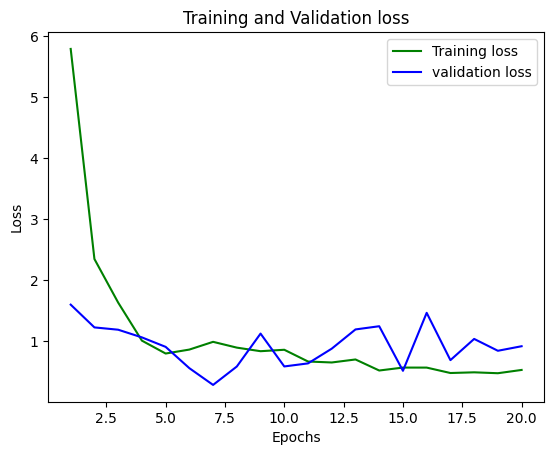

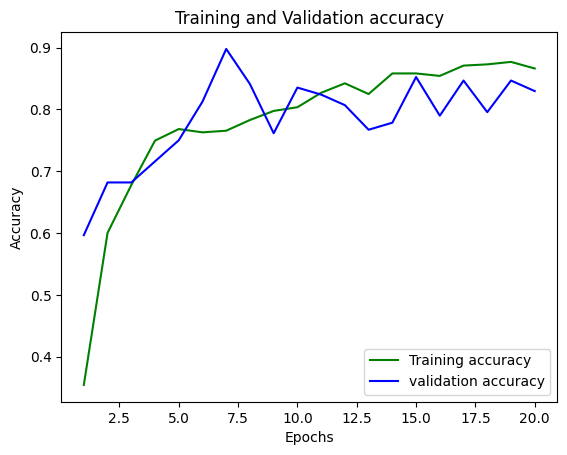

In [38]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [39]:
model.summary()

Model: "transfer_net_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  1605696   
                                                                 
 dropout_12 (Dropout)        multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  2080      
                                                                 
 dropout_13 (Dropout)        multiple                  0         
                                                                 
 dense_8 (Dense)             multiple               

In [40]:
model.save_weights('yoga_weights.h5')

In [41]:
#for gradio
def predict_image(img):
    # Redimensionar y preprocesar la imagen
    img = img.reshape(1, width, height, 3)
    img = img / 255.0

    # Hacer la predicción
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)

    # Obtener el nombre de la clase
    class_names = list(train_data.class_indices.keys())
    return class_names[predicted_class]


In [42]:


interface = gr.Interface(
    fn=predict_image, 
    inputs=gr.inputs.Image(shape=(width, height)), 
    outputs="text",
    live=True,
    capture_session=True
)
interface.launch()


/var/folders/x_/ll96cm_j5r34j0gcqbw987mw0000gn/T/ipykernel_41006/2586692711.py:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(shape=(width, height)),
/var/folders/x_/ll96cm_j5r34j0gcqbw987mw0000gn/T/ipykernel_41006/2586692711.py:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(shape=(width, height)),
/var/folders/x_/ll96cm_j5r34j0gcqbw987mw0000gn/T/ipykernel_41006/2586692711.py:1: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  interface = gr.Interface(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Resultados del modelo

2023-08-16 20:35:41.067382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 12s 937ms/step


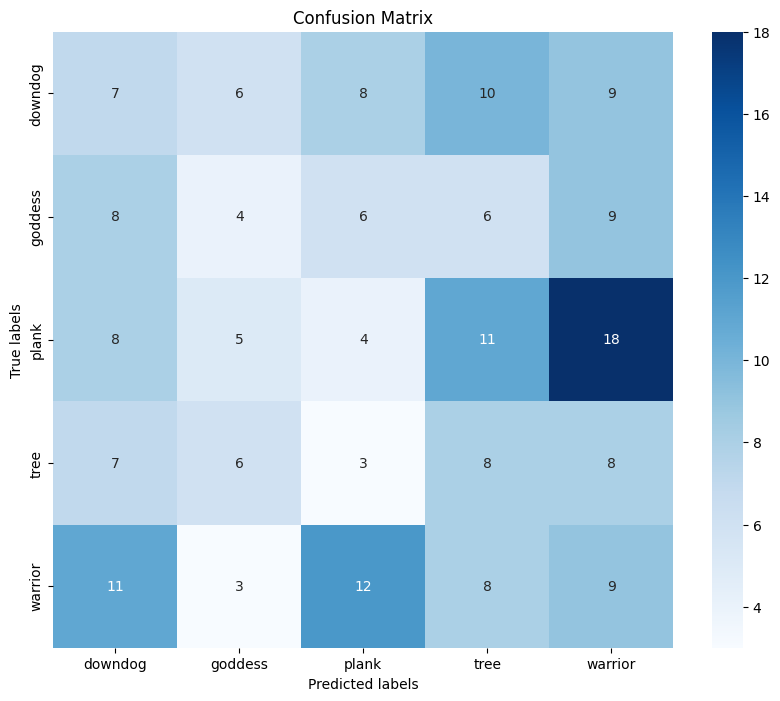

In [43]:
# Obtener las predicciones del modelo
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Calcular la matriz de confusión
confusion = confusion_matrix(true_classes, predicted_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Predice las etiquetas de tus datos de prueba.
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Obtén las etiquetas verdaderas de tus datos de prueba.
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# 3. Usa `classification_report` para obtener el informe.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


13/13 [==============================] - 10s 755ms/step
              precision    recall  f1-score   support

     downdog       0.23      0.23      0.23        40
     goddess       0.15      0.12      0.14        33
       plank       0.25      0.17      0.21        46
        tree       0.17      0.25      0.21        32
     warrior       0.30      0.35      0.32        43

    accuracy                           0.23       194
   macro avg       0.22      0.22      0.22       194
weighted avg       0.23      0.23      0.22       194



In [44]:
def display_activation_graph(model, image, layer_name):
    """
    Display the activations of a specific layer for a given image.
    
    Parameters:
    - model: Trained model.
    - image: Input image (should be preprocessed).
    - layer_name: Name of the layer whose activations you want to visualize.
    """
    
    # Create a sub-model that ends at the specified layer
    layer_output = getattr(model, layer_name).output
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=layer_output)
    
    # Get the activations for the image
    activations = intermediate_layer_model.predict(np.expand_dims(image, axis=0))
    
    # Number of features in the feature map
    num_features = activations.shape[-1]
    
    # Size of the grid
    size = int(np.sqrt(num_features))
    
    # Create a grid of subplots
    fig, axes = plt.subplots(size, size, figsize=(10, 10))
    
    for i in range(size):
        for j in range(size):
            if (i*size + j) < num_features:
                ax = axes[i, j]
                ax.imshow(activations[0, :, :, i*size + j], cmap='viridis')
                ax.axis('off')
            else:
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a preprocessed image called 'input_image'
# display_activation_graph(model, input_image, 'conv1')  # Display activations of the layer named 'conv1'


In [45]:
# Asegúrate de que el modelo ha sido llamado al menos una vez
dummy_input = np.random.random((1, width, height, 3))
_ = model(dummy_input)


In [46]:

from tensorflow.keras.preprocessing import image as keras_image

# 1. Cargar una imagen
img_path = '/Users/johanjairgilcesreyes/Desktop/ESPOL/IA/Proyecto/YOGA/DATA/tree/00000082.jpg'  
img = keras_image.load_img(img_path, target_size=(250, 224))

# 2. Preprocesar la imagen
img_array = keras_image.img_to_array(img)
img_array = img_array / 255.0  # Escalar los valores de píxeles al rango [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el batch

# 3. Usar la función display_activation_graph
# Asumiendo que tu modelo se llama 'model' y quieres visualizar las activaciones de la primera capa convolucional
display_activation_graph(model, img_array, 2)

TypeError: getattr(): attribute name must be string

2023-08-16 20:37:56.609664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 643ms/step


Traceback (most recent call last):
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/Users/johanjairgilcesr

1/1 [==============================] - 0s 25ms/step


Traceback (most recent call last):
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/Users/johanjairgilcesr

1/1 [==============================] - 0s 21ms/step


Traceback (most recent call last):
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/Users/johanjairgilcesr

1/1 [==============================] - 0s 21ms/step


Traceback (most recent call last):
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/Users/johanjairgilcesreyes/miniconda3/envs/myenv/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/Users/johanjairgilcesr

1/1 [==============================] - 0s 25ms/step
